# $Integration$ $using$ $Trapezoidal$ $Rule$ $and$ $Simpson's$ $Methods$

### Problem-1: 

Suppose that the temperature of a rectangular heated plate is
described by the following function:

$T(x, y) = 2xy + 2x − x^{2} − 2y^{2} + 72$

If the plate is 8-m long (x-direction) and 6-m wide(y-direction), compute the average temperature using various methods for integration. Compare your results with the analytical one to find the most accurate average temperature.


In [1]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d

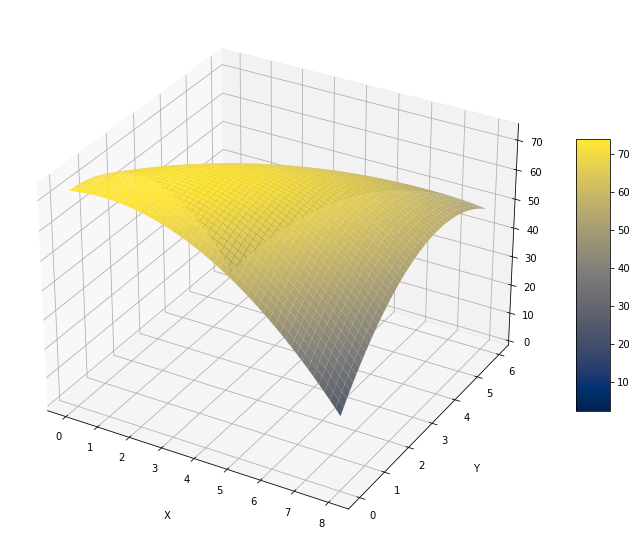

In [2]:
# let us take a look at a 3d plot with temperature on the Z axis

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection ='3d')
x = np.linspace(0,8,500)
y = np.linspace(0,6,500)
X, Y = np.meshgrid(x, y)

T = 0
    
T = 2*X*Y + 2*X - X**2 - 2*Y**2 + 72 
        
surf = ax.plot_surface(X, Y, T, cmap = plt.cm.cividis)
    
ax.set_xlabel('X', labelpad=20)
ax.set_ylabel('Y', labelpad=20)
ax.set_zlabel('T', labelpad = 20)
fig.colorbar(surf, shrink = 0.5, aspect = 8)
plt.show()        

In [3]:
def t(X, Y):
    return 2*X*Y + 2*X - X**2 - 2*Y**2 + 72

### Trapezoidal Method

Error is given by  $-\frac{1}{12}h^3f^{''}(\xi)$

In [32]:
def trap1d(xi, xf, y, n):
    h = float((xf - xi)/n)
    
    area = t(xi, y) + t(xf, y)
    if n > 1:
        for i in range(1, n):
            area += 2*t(xi + i*h, y)
    return area*(xf - xi)/(2*n)    

In [33]:
def trap2d(xi, xf, yi, yf, n):
    hx = float((xf- xi)/n)
    hy = (yf - yi)/n
    
    a = trap1d(xi, xf, yi, n) + trap1d(xi, xf, yf, n)
        
    if n > 1:
        for i in range(1, n):
            a += 2 * trap1d(xi, xf, yi + i*hy, n)
    
    a = a * (yf - yi)/(2 * n)
    
    avg_temp = a/48.0
    actual = float(2816/48.0)
    err = 100 * abs(avg_temp - actual)/actual
    
    print("No. of steps : {} \t Integral : {} \t Average Temperature : {} \t Error : {}"
          .format(n, np.round(a, 3), np.round(avg_temp, 6), np.round(err,6)))
          
    return avg_temp

In [34]:
print("Trapezoidal Method\n")

for n in [1, 5,10,25,50,100,200, 500, 1000]:
    trap2d(0,8,0,6,n)

Trapezoidal Method

No. of steps : 1 	 Integral : 1728.0 	 Average Temperature : 36.0 	 Error : 38.636364
No. of steps : 5 	 Integral : 2772.48 	 Average Temperature : 57.76 	 Error : 1.545455
No. of steps : 10 	 Integral : 2805.12 	 Average Temperature : 58.44 	 Error : 0.386364
No. of steps : 25 	 Integral : 2814.259 	 Average Temperature : 58.6304 	 Error : 0.061818
No. of steps : 50 	 Integral : 2815.565 	 Average Temperature : 58.6576 	 Error : 0.015455
No. of steps : 100 	 Integral : 2815.891 	 Average Temperature : 58.6644 	 Error : 0.003864
No. of steps : 200 	 Integral : 2815.973 	 Average Temperature : 58.6661 	 Error : 0.000966
No. of steps : 500 	 Integral : 2815.996 	 Average Temperature : 58.666576 	 Error : 0.000155
No. of steps : 1000 	 Integral : 2815.999 	 Average Temperature : 58.666644 	 Error : 3.9e-05


### Simpson's $\frac{1}{3}$ Method

Error = $-\frac{1}{90}h^5f^{4}(\xi)$

In [35]:
def simpson1_3_1d(xi,xf, y, n):
    h = (xf - xi)/n
    
    area = t(xi, y) + t(xf, y)
    
    if n > 1:
        for i in range(1, n):
            if i % 2 == 0:
                area += 2 * t(xi + i*h, y)
            else:
                area += 4 * t(xi + i*h, y)

    area = h*area/3 
    
    return area

In [36]:
def simpson1_3_2d(xi,xf, yi, yf, n):
    n += 1
    hx = (xf- xi)/n
    hy = (yf - yi)/n
      
    area = simpson1_3_1d(xi, xf, yi, n) + simpson1_3_1d(xi, xf, yf, n)
    
    if n > 1:
        for i in range(1, n):
            if i % 2 == 0:
                area += 2*simpson1_3_1d(xi, xf, yi + i*hy, n)
            else:
                area += 4*simpson1_3_1d(xi, xf, yi + i*hy, n)
    
    area = hy * area / 3.00
    avg_temp = float(area/48.0)
    actual = float(2816/48.0)
    err = 100 * abs(avg_temp - actual)/actual
    
    print("No. of steps : {} \t Integral : {} \t Average Temperature : {} \t Error : {}"
          .format(n-1, np.round(area, 3), np.round(avg_temp, 7), np.round(err, 7)))
          
    #return avg_temp

In [37]:
print("Simpson's 1/3rd Method\n")

simpson1_3_2d(0,8,0,6,1)

Simpson's 1/3rd Method

No. of steps : 1 	 Integral : 2816.0 	 Average Temperature : 58.6666667 	 Error : 0.0


### Simpson's $\frac{3}{8}$ Method

Error = $-\frac{3}{80}h^5f^{4}(\xi)$

In [15]:
def simpson3_8_1d(xi,xf, y, n):
    h = (xf - xi)/n
    
    area = t(xi, y) + t(xf, y)
    
    if n > 1:
        for i in range(1, n):
            if i % 3 == 0 :
                area += 2.0 * t(xi + i*h, y)
            elif i % 3 == 1:
                area += 3.0 * t(xi + i*h, y)
            else:
                area += 3.0 * t(xi + i*h, y)

    area = 3*h*area/8 
    
    return area

In [28]:
def simpson3_8_2d(xi,xf, yi, yf, n):
    n += 2
    hx = float((xf- xi)/n)
    hy = float((yf - yi)/n)
      
    area = simpson3_8_1d(xi, xf, yi, n) + simpson3_8_1d(xi, xf, yf, n)
    
    if n > 1:
        for i in range(1, n):
            if i % 3 == 0 :
                area += 2 * simpson3_8_1d(xi, xf, yi + i*hy, n)
            elif i % 3 == 1:
                area += 3 * simpson3_8_1d(xi, xf, yi + i*hy, n)
            else:
                area += 3 * simpson3_8_1d(xi, xf, yi + i*hy, n)
    
    area = 3* hy * area / 8.00
    avg_temp = float(area/48.0)
    actual = float(2816/48.0)
    err = 100 * abs(avg_temp - actual)/actual
    
    print("No. of steps : {} \t Integral : {} \t Average Temperature : {} \t Error : {}"
          .format(n-2, np.round(area, 3), np.round(avg_temp, 7), np.round(err, 7)))
          
    #return avg_temp

In [29]:
print("Simpson's 3/8 Method\n")

simpson3_8_2d(0,8,0,6,1)

Simpson's 3/8 Method

No. of steps : 1 	 Integral : 2816.0 	 Average Temperature : 58.6666667 	 Error : 0.0
